In [83]:
import citybikes
import pandas as pd
from matplotlib import pylab as plt
import pyproj
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
import numpy as np
import overpy

Fetching bike stations data ...

In [2]:
cb_client = citybikes.Client()

In [3]:
serv_id = [x['id'] for x in list(cb_client.networks) if x['location']['country'] == 'FI'][0]

In [4]:
serv_id

'citybikes-helsinki'

In [5]:
bicing = citybikes.Network(cb_client, uid=serv_id)

In [6]:
list(bicing.stations)[0]

{'empty_slots': 5, 'extra': {'uid': '1215'}, 'free_bikes': 5, 'id': 'ea7b0e779692b10deac011d32040c7cd', 'latitude': 60.2689544, 'longitude': 24.8201851, 'name': 'Luhtimäki', 'timestamp': '2021-04-22T08:09:23.799000Z'}

In [54]:
needed_attr = ['empty_slots','free_bikes', 'latitude', 'longitude', 'name', 'timestamp' ]

Storing them into dataframe ...

In [55]:
df_stations = pd.DataFrame([dict([(attr, x[attr]) for attr in needed_attr]) for x in list(bicing.stations)])

In [56]:
df_stations

,empty_slots,free_bikes,latitude,longitude,name,timestamp
0,5,5,60.268954,24.820185,Luhtimäki,2021-04-22T08:09:23.799000Z
1,5,5,60.279606,24.815069,Petikontie,2021-04-22T08:09:23.803000Z
2,5,5,60.277978,24.821893,Martinkyläntie,2021-04-22T08:09:23.805000Z
3,6,4,60.301220,24.856554,Vantaanpuisto,2021-04-22T08:09:23.806000Z
4,13,7,60.294825,24.844223,Vehkala station,2021-04-22T08:09:23.807000Z
...,...,...,...,...,...,...
446,9,9,60.220301,24.933737,Postipuisto,2021-04-22T08:09:24.776000Z
447,4,21,60.180118,24.771826,Orionintie,2021-04-22T08:09:24.869000Z
448,14,6,60.163412,24.742219,Outotec,2021-04-22T08:09:24.876000Z
449,7,13,60.209017,24.835356,Derby Business Park,2021-04-22T08:09:24.878000Z


In [57]:
df_stations['total_slots'] = df_stations.free_bikes + df_stations.empty_slots

In [58]:
df_stations

,empty_slots,free_bikes,latitude,longitude,name,timestamp,total_slots
0,5,5,60.268954,24.820185,Luhtimäki,2021-04-22T08:09:23.799000Z,10
1,5,5,60.279606,24.815069,Petikontie,2021-04-22T08:09:23.803000Z,10
2,5,5,60.277978,24.821893,Martinkyläntie,2021-04-22T08:09:23.805000Z,10
3,6,4,60.301220,24.856554,Vantaanpuisto,2021-04-22T08:09:23.806000Z,10
4,13,7,60.294825,24.844223,Vehkala station,2021-04-22T08:09:23.807000Z,20
...,...,...,...,...,...,...,...
446,9,9,60.220301,24.933737,Postipuisto,2021-04-22T08:09:24.776000Z,18
447,4,21,60.180118,24.771826,Orionintie,2021-04-22T08:09:24.869000Z,25
448,14,6,60.163412,24.742219,Outotec,2021-04-22T08:09:24.876000Z,20
449,7,13,60.209017,24.835356,Derby Business Park,2021-04-22T08:09:24.878000Z,20


Preparing geo-dataframe based on geodedic coordinates ...

In [59]:
proj_epsg_4326 = pyproj.CRS.from_epsg('4326')
proj_epsg_3857 = pyproj.CRS.from_epsg('3857')

In [60]:
gdf_stations = gpd.GeoDataFrame(df_stations, crs=proj_epsg_4326,
                                geometry=[Point(tuple(x)) for x in df_stations[['longitude','latitude']].values])

In [64]:
gdf_stations

,empty_slots,free_bikes,latitude,longitude,name,timestamp,total_slots,geometry
0,5,5,60.268954,24.820185,Luhtimäki,2021-04-22T08:09:23.799000Z,10,POINT (24.82019 60.26895)
1,5,5,60.279606,24.815069,Petikontie,2021-04-22T08:09:23.803000Z,10,POINT (24.81507 60.27961)
2,5,5,60.277978,24.821893,Martinkyläntie,2021-04-22T08:09:23.805000Z,10,POINT (24.82189 60.27798)
3,6,4,60.301220,24.856554,Vantaanpuisto,2021-04-22T08:09:23.806000Z,10,POINT (24.85655 60.30122)
4,13,7,60.294825,24.844223,Vehkala station,2021-04-22T08:09:23.807000Z,20,POINT (24.84422 60.29482)
...,...,...,...,...,...,...,...,...
446,9,9,60.220301,24.933737,Postipuisto,2021-04-22T08:09:24.776000Z,18,POINT (24.93374 60.22030)
447,4,21,60.180118,24.771826,Orionintie,2021-04-22T08:09:24.869000Z,25,POINT (24.77183 60.18012)
448,14,6,60.163412,24.742219,Outotec,2021-04-22T08:09:24.876000Z,20,POINT (24.74222 60.16341)
449,7,13,60.209017,24.835356,Derby Business Park,2021-04-22T08:09:24.878000Z,20,POINT (24.83536 60.20902)


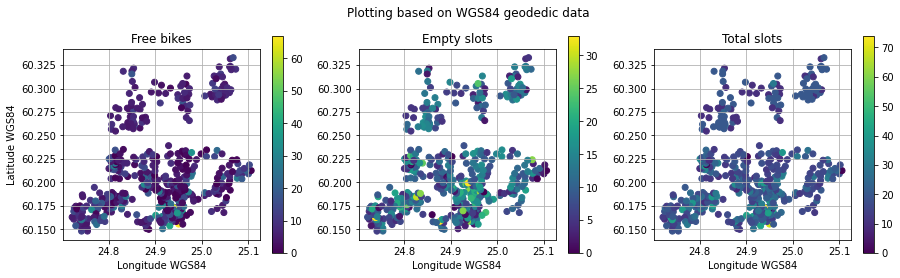

In [61]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(15)
plt.suptitle('Plotting based on WGS84 geodedic data')

gdf_stations.plot(ax=ax1, column='free_bikes', legend=True)
ax1.set_title('Free bikes')
ax1.set_xlabel('Longitude WGS84')
ax1.set_ylabel('Latitude WGS84')
ax1.grid()

gdf_stations.plot(ax=ax2, column='empty_slots', legend=True)
ax2.set_title('Empty slots')
ax2.set_xlabel('Longitude WGS84')
ax2.grid()

gdf_stations.plot(ax=ax3, column='total_slots', legend=True)
ax3.set_title('Total slots')
ax3.set_xlabel('Longitude WGS84')
ax3.grid()

Conversion to web-merkator metric projection ...

In [62]:
gdf_stations_m = gdf_stations.to_crs(proj_epsg_3857)

In [63]:
gdf_stations_m

,empty_slots,free_bikes,latitude,longitude,name,timestamp,total_slots,geometry
0,5,5,60.268954,24.820185,Luhtimäki,2021-04-22T08:09:23.799000Z,10,POINT (2762970.367 8459862.599)
1,5,5,60.279606,24.815069,Petikontie,2021-04-22T08:09:23.803000Z,10,POINT (2762400.845 8462253.825)
2,5,5,60.277978,24.821893,Martinkyläntie,2021-04-22T08:09:23.805000Z,10,POINT (2763160.489 8461888.284)
3,6,4,60.301220,24.856554,Vantaanpuisto,2021-04-22T08:09:23.806000Z,10,POINT (2767018.901 8467108.673)
4,13,7,60.294825,24.844223,Vehkala station,2021-04-22T08:09:23.807000Z,20,POINT (2765646.309 8465671.956)
...,...,...,...,...,...,...,...,...
446,9,9,60.220301,24.933737,Postipuisto,2021-04-22T08:09:24.776000Z,18,POINT (2775610.906 8448949.652)
447,4,21,60.180118,24.771826,Orionintie,2021-04-22T08:09:24.869000Z,25,POINT (2757587.056 8439948.817)
448,14,6,60.163412,24.742219,Outotec,2021-04-22T08:09:24.876000Z,20,POINT (2754291.220 8436209.980)
449,7,13,60.209017,24.835356,Derby Business Park,2021-04-22T08:09:24.878000Z,20,POINT (2764659.184 8446420.967)


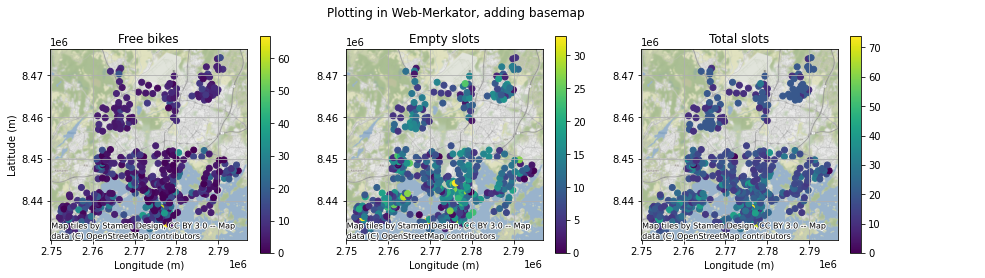

In [68]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(15)
plt.suptitle('Plotting in Web-Merkator, adding basemap')

gdf_stations_m.plot(ax=ax1, column='free_bikes', legend=True)
ax1.set_title('Free bikes')
ax1.set_xlabel('Longitude (m)')
ax1.set_ylabel('Latitude (m)')
ax1.grid()
ctx.add_basemap(ax=ax1)

gdf_stations_m.plot(ax=ax2, column='empty_slots', legend=True)
ax2.set_title('Empty slots')
ax2.set_xlabel('Longitude (m)')
ax2.grid()
ctx.add_basemap(ax=ax2)

gdf_stations_m.plot(ax=ax3, column='total_slots', legend=True)
ax3.set_title('Total slots')
ax3.set_xlabel('Longitude (m)')
ax3.grid()
ctx.add_basemap(ax=ax3)

Fetching district data ...

In [101]:
df_bbox = df_stations[['latitude','longitude']]\
    .describe().loc[['min','max']]\
    .rename(columns={'longitude':'lon', 'latitude':'lat'})

In [105]:
bbox_str = ', '.join(['%.10f' % x for x in df_bbox.values.reshape(-1)])

In [106]:
bbox_str

'60.1479210000, 24.7213670000, 60.3330046000, 25.1061987430'

In [84]:
overpass_api = overpy.Overpass()

In [123]:
result = overpass_api.query('''
(
  node["admin_level"="9"](%s);
  way["admin_level"="9"](%s);
  relation["admin_level"="9"](%s);
);
(._;>;);
out;
''' % (bbox_str, bbox_str, bbox_str))

In [140]:
# Collect the nodes
node_cols = ['id','lon','lat']
df_nodes = pd.DataFrame([[getattr(node,a) for a in node_cols] for node in result.nodes])\
    .rename(columns=dict(zip(range(len(node_cols)),node_cols)))

In [144]:
df_nodes = df_nodes.set_index(df_nodes.id)
del df_nodes['id']
df_nodes

,lon,lat
id,,
25446974,24.8468462,60.2040096
25598593,24.9845143,60.2137477
25598594,24.9842819,60.2142681
25598606,24.9846818,60.2146253
25598607,24.9850955,60.2147731
...,...,...
8421467269,24.8358607,60.2401147
8423168997,25.1132382,60.3355067
8428384698,25.0918773,60.3320354


In [157]:
# Collect the ways
df_ways = pd.DataFrame(np.concatenate([np.asarray([(w.id,n.id) for n in w.nodes]) for w in result.ways]))\
    .rename(columns={0:'way', 1:'node'})

In [160]:
df_ways = df_ways.set_index(df_ways.way)
del df_ways['way']
df_ways

,node
way,
26947154,300508034
26947154,300508035
26947154,300508036
26947154,300508037
26947154,300508038
...,...
888848447,301716478
888849341,1962736511
888849341,3825135897


In [195]:
# Collect relations
df_relations = pd.DataFrame(np.concatenate(
    [np.asarray([(r.id,x.ref) for x in r.members if isinstance(x, overpy.RelationWay)])\
     for r in result.relations]))\
    .rename(columns={0: 'rel', 1: 'way'})

In [197]:
df_relations = df_relations.set_index(df_relations.rel)
del df_relations['rel']
df_relations

,way
rel,
2335205,366710414
2335205,174759810
2335205,123860509
2335205,38539806
2335205,38539788
...,...
12095896,38536134
12095896,38579098
12095896,38579099


In [203]:
df_descriptions = pd.DataFrame([(r.id, r.tags['name']) for r in result.relations])\
    .rename(columns={0:'rel',1:'description'})

In [205]:
df_descriptions = df_descriptions.set_index(df_descriptions.rel)
del df_descriptions['rel']
df_descriptions

,description
rel,
2335205,Myyrmäen suuralue
2736125,Suur-Leppävaara
2906483,Kivistön suuralue
2906576,Aviapoliksen suuralue
2913723,Tikkurilan suuralue
2913724,Koivukylän suuralue
3189853,Hakunilan suuralue
3189932,Korson suuralue
3208564,Pohjois-Espoo


Let's finally collect the contours of the districs and plot them ...